<a href="https://colab.research.google.com/github/onurozansunger/FDS-PROJECT/blob/main/ameley%C3%B6ntemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import seaborn as sns


In [3]:
netflix4 = pd.read_csv('/content/netflix4.csv')

In [4]:
netflix4.head()

,show_id,type,title,country,release_year,rating,averageRating,numVotes,genres,directors,category,primaryName
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actor,Michael Hilow
1,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actress,Ana Hoffman
2,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,8.0,22.0,"Crime,Documentary",nm1520612,actress,Susan Sarandon
3,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,director,Mike Smith
4,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,actor,Neill Rea


In [5]:
netflix4.drop(['type', 'country', 'rating', 'directors', 'title'], axis=1, inplace=True)


In [6]:
netflix4.head()

,show_id,release_year,averageRating,numVotes,genres,category,primaryName
0,s1,2020,7.4,7119.0,"Biography,Documentary,Drama",actor,Michael Hilow
1,s1,2020,7.4,7119.0,"Biography,Documentary,Drama",actress,Ana Hoffman
2,s2,2021,8.0,22.0,"Crime,Documentary",actress,Susan Sarandon
3,s2,2021,7.3,528.0,"Crime,Drama,Mystery",director,Mike Smith
4,s2,2021,7.3,528.0,"Crime,Drama,Mystery",actor,Neill Rea


In [7]:
import pandas as pd

# Veri setini yükleme
netflix4 = pd.read_csv('netflix4.csv')

# Her bir kategorideki isimleri toplayan fonksiyon
def collect_names(df, category):
    return df[df['category'] == category]['primaryName'].tolist()

# show_id'ye göre gruplama ve her kategori için isimleri toplama
grouped = netflix4.groupby('show_id')
netflix4_grouped = pd.DataFrame({
    'actors': grouped.apply(lambda x: collect_names(x, 'actor')),
    'actresses': grouped.apply(lambda x: collect_names(x, 'actress')),
    'directors': grouped.apply(lambda x: collect_names(x, 'director'))
}).reset_index()

# Yeni DataFrame'in ilk beş satırını gösterme
print(netflix4_grouped.head())

  show_id                                             actors  \
0      s1                                    [Michael Hilow]   
1     s10      [Kevin Kline, Timothy Olyphant, Chris O'Dowd]   
2    s100  [Mathieu Demy, Giovanni Ribisi, Troy Garity, T...   
3   s1000  [Montagu Love, Lee Moran, Eugene Pallette, Ros...   
4   s1001  [Nagarjuna Akkineni, Atul Kulkarni, Tycho Post...   

                                           actresses  \
0                                      [Ana Hoffman]   
1                                 [Melissa McCarthy]   
2  [Elisabeth Shue, Julie Delpy, Alexia Landeau, ...   
3  [Fay Wray, Shirley Temple, Alice Faye, Blair B...   
4                          [Dia Mirza, Saiyami Kher]   

                                           directors  
0                                                 []  
1                                   [Theodore Melfi]  
2                                    [Robin Munshaw]  
3  [William A. Seiter, Phil Whitman, Corey Allen,...  
4  

In [17]:
netflix_rating=netflix4["averageRating"]

<Axes: xlabel='averageRating'>

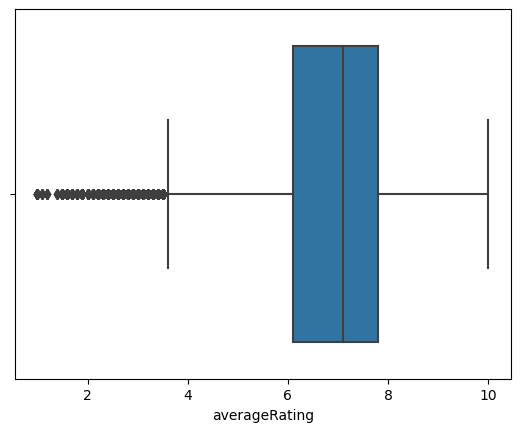

In [18]:
sns.boxplot(x=netflix_rating)

In [19]:
numvotes=netflix4["numVotes"]

<Axes: xlabel='numVotes'>

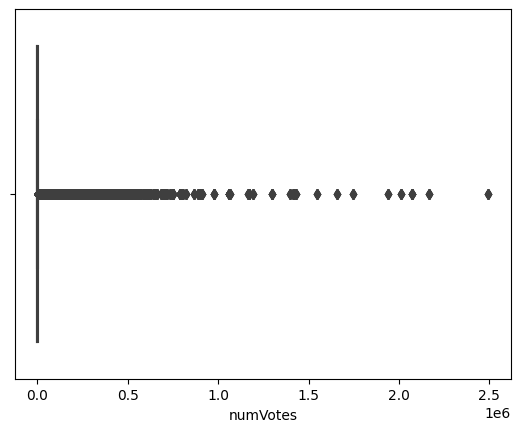

In [20]:
sns.boxplot(x=numvotes)

In [8]:
warnings.filterwarnings('ignore')

# Tüm benzersiz isimleri toplama
all_actors = set().union(*netflix4_grouped['actors'])
all_actresses = set().union(*netflix4_grouped['actresses'])
all_directors = set().union(*netflix4_grouped['directors'])

# One-hot encoding için boş DataFrame'ler oluşturma
actor_df = pd.DataFrame()
actress_df = pd.DataFrame()
director_df = pd.DataFrame()

# Her bir isim için one-hot encoding uygulama
for actor in all_actors:
    actor_df['actor_' + actor] = netflix4_grouped['actors'].apply(lambda x: 1 if actor in x else 0)

for actress in all_actresses:
    actress_df['actress_' + actress] = netflix4_grouped['actresses'].apply(lambda x: 1 if actress in x else 0)

for director in all_directors:
    director_df['director_' + director] = netflix4_grouped['directors'].apply(lambda x: 1 if director in x else 0)

# Ana DataFrame ile birleştirme
netflix4_encoded = pd.concat([netflix4_grouped, actor_df, actress_df, director_df], axis=1)

# Orijinal 'actors', 'actresses', ve 'directors' sütunlarını kaldırma
netflix4_encoded.drop(['actors', 'actresses', 'directors'], axis=1, inplace=True)

# Yeni DataFrame'in ilk beş satırını gösterme
print(netflix4_encoded.head())

  show_id  actor_Sean Michael Nugent  actor_Hale Studebaker  actor_IllBliss  \
0      s1                          0                      0               0   
1     s10                          0                      0               0   
2    s100                          0                      0               0   
3   s1000                          0                      0               0   
4   s1001                          0                      0               0   

   actor_Haitham Al'Maan  actor_Hal Baylor  actor_Martin Hylander Brucker  \
0                      0                 0                              0   
1                      0                 0                              0   
2                      0                 0                              0   
3                      0                 0                              0   
4                      0                 0                              0   

   actor_Brian Dietzen  actor_Charles Evans  actor_William Kno

In [11]:
netflix4_encoded.columns

Index(['show_id', 'actor_Sean Michael Nugent', 'actor_Hale Studebaker',
       'actor_IllBliss', 'actor_Haitham Al'Maan', 'actor_Hal Baylor',
       'actor_Martin Hylander Brucker', 'actor_Brian Dietzen',
       'actor_Charles Evans', 'actor_William Knopp',
       ...
       'director_Sharan Sharma', 'director_Frode Klevstul',
       'director_Pat Necerato', 'director_Andrew Cymek',
       'director_Joseph Riggi', 'director_John Herzfeld', 'director_Viet Max',
       'director_Per-Olav Sørensen', 'director_Damon Berry',
       'director_Robert Stevens'],
      dtype='object', length=82002)

In [ ]:
netflix4_encoded.drop(['type', 'country', 'rating', 'directors', 'title'], axis=1, inplace=True)


In [ ]:
netflix4_encoded = netflix4_encoded.merge(netflix4[['show_id', 'averageRating', 'numVotes']], on='show_id')

# Özellikler (features) ve hedef değişkenler (target variables)
X = netflix4_encoded.drop(['show_id', 'averageRating', 'numVotes'], axis=1)
y_rating = netflix4_encoded['averageRating']
y_numVotes = netflix4_encoded['numVotes']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train_rating, y_test_rating = train_test_split(X, y_rating, test_size=0.2, random_state=42)
X_train, X_test, y_train_numVotes, y_test_numVotes = train_test_split(X, y_numVotes, test_size=0.2, random_state=42)

# Lineer regresyon modelini oluşturma ve eğitme
model_rating = LinearRegression()
model_rating.fit(X_train, y_train_rating)

model_numVotes = LinearRegression()
model_numVotes.fit(X_train, y_train_numVotes)

# Test verisi üzerinde tahmin yapma ve performans değerlendirme
y_pred_rating = model_rating.predict(X_test)
y_pred_numVotes = model_numVotes.predict(X_test)

mse_rating = mean_squared_error(y_test_rating, y_pred_rating)
mse_numVotes = mean_squared_error(y_test_numVotes, y_pred_numVotes)

print("Rating için Ortalama Kare Hata (MSE):", mse_rating)
print("NumVotes için Ortalama Kare Hata (MSE):", mse_numVotes)